In [1]:
import pandas as pd

# Step 1: Load the raw dataset
file_path = '/content/bank-full.csv'  # Replace with your file name
raw_data = pd.read_csv(file_path, header=None)  # Load without assuming headers

# Step 2: Split the data into separate columns using ';' as the delimiter
formatted_data = raw_data[0].str.split(';', expand=True)

# Step 3: Treat the first row as the column headers
formatted_data.columns = formatted_data.iloc[0]  # Set the first row as headers
formatted_data = formatted_data[1:]  # Remove the first row from the data

# Step 4: Remove double quotes from all cells
formatted_data = formatted_data.replace('"', '', regex=True)

# Step 5: Save the cleaned data to a new CSV file
output_file_path = 'formatted_bank_data.csv'
formatted_data.to_csv(output_file_path, index=False)

print(f"Formatted data saved to {output_file_path}")

# Step 6: Print the first 10 rows of the formatted data
print("First 10 rows of the formatted data:")
print(formatted_data.head(3))


Formatted data saved to formatted_bank_data.csv
First 10 rows of the formatted data:
0 age         "job" "marital" "education" "default" "balance" "housing"  \
1  58    management   married    tertiary        no      2143       yes   
2  44    technician    single   secondary        no        29       yes   
3  33  entrepreneur   married   secondary        no         2       yes   

0 "loan" "contact" "day" "month" "duration" "campaign" "pdays" "previous"  \
1     no   unknown     5     may        261          1      -1          0   
2     no   unknown     5     may        151          1      -1          0   
3    yes   unknown     5     may         76          1      -1          0   

0 "poutcome" "y"  
1    unknown  no  
2    unknown  no  
3    unknown  no  


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = 'formatted_bank_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Remove unnecessary quotes in column names if still present
data.columns = data.columns.str.replace('"', '')

# Detect and handle outliers using the IQR method
def remove_outliers_iqr(df, numeric_columns):
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of numeric columns to process
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
data = remove_outliers_iqr(data, numeric_cols)

In [ ]:
# Convert categorical variables to numerical using LabelEncoder
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Normalize numeric columns
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Save preprocessed data to a new file
output_file_path = 'preprocessed_bank_data.csv'  # Replace with your desired file name and path
data.to_csv(output_file_path, index=False)

print(f"Preprocessed data has been saved to {output_file_path}")

Preprocessed data has been saved to preprocessed_bank_data.csv


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the preprocessed data
file_path = 'preprocessed_bank_data.csv'  # Path to the preprocessed file
data = pd.read_csv(file_path)

# Separate features and target variable
X = data.drop(columns=['y'])  # Features
y = data['y']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print("Original class distribution:")
print(pd.Series(y).value_counts())

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


# Confirm resampling
print(f"Original training set class distribution:\n{y_train.value_counts()}")
print(f"Resampled training set class distribution:\n{pd.Series(y_train_resampled).value_counts()}")

print("Outliers handled and SMOTE applied successfully!")

Original class distribution:
y
0    26504
1     1565
Name: count, dtype: int64
Class distribution after SMOTE:
y
0    21203
1    21203
Name: count, dtype: int64
Original training set class distribution:
y
0    21203
1     1252
Name: count, dtype: int64
Resampled training set class distribution:
y
0    21203
1    21203
Name: count, dtype: int64
Outliers handled and SMOTE applied successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9438902743142145
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      5301
           1       0.49      0.14      0.21       313

    accuracy                           0.94      5614
   macro avg       0.72      0.56      0.59      5614
weighted avg       0.93      0.94      0.93      5614

Confusion Matrix:
 [[5256   45]
 [ 270   43]]


In [ ]:
# Define the neural network model
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Predictions
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype(int)

# Evaluate the model
print("Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print("Classification Report:\n", classification_report(y_test, y_pred_nn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nn))


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8512 - loss: 0.3358 - val_accuracy: 0.9381 - val_loss: 0.1853
Epoch 2/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9431 - loss: 0.1685 - val_accuracy: 0.9423 - val_loss: 0.1752
Epoch 3/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9483 - loss: 0.1583 - val_accuracy: 0.9417 - val_loss: 0.1733
Epoch 4/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9453 - loss: 0.1615 - val_accuracy: 0.9430 - val_loss: 0.1713
Epoch 5/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1584 - val_accuracy: 0.9434 - val_loss: 0.1681
Epoch 6/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9454 - loss: 0.1614 - val_accuracy: 0.9434 - val_loss: 0.1760
Epoch 7/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9439 - loss: 0.1577 - val_accuracy: 0.9434 - val_loss: 0.1668
Epoch 8/20
562/562 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9479 - loss: 0.1496 - val_accuracy: 0.9434 - val_

In [ ]:
# Compare Random Forest and Neural Network
rf_accuracy = accuracy_score(y_test, y_pred_rf)
nn_accuracy = accuracy_score(y_test, y_pred_nn)

print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Neural Network Accuracy: {nn_accuracy}")


Random Forest Accuracy: 0.9438902743142145
Neural Network Accuracy: 0.944424652654079


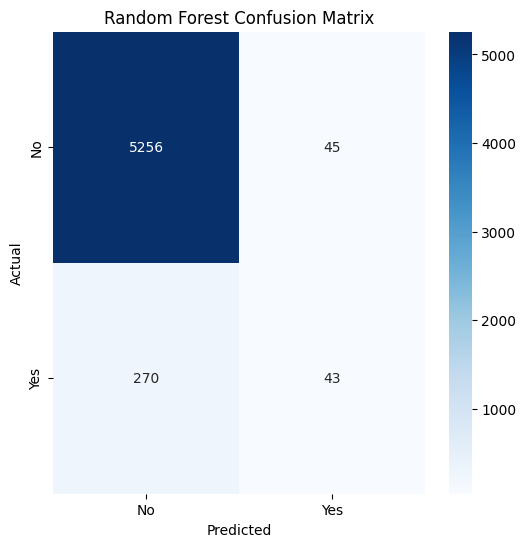

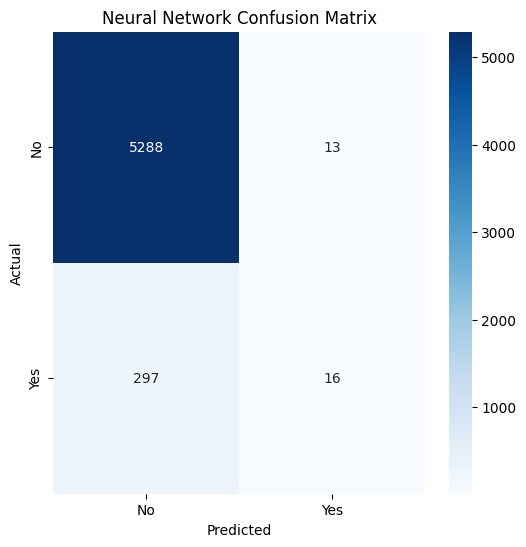

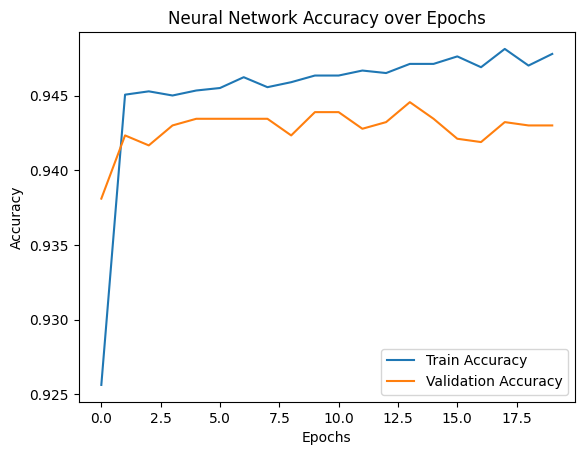

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Neural Network Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Neural Network Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import joblib

# Save Random Forest model
joblib.dump(rf_model, 'random_forest_model.pkl')
# Save Neural Network model in the new Keras format
nn_model.save('neural_network_model.keras')




print("Models saved successfully!")


Neural Network model saved successfully in the new Keras format!
Models saved successfully!
